## [Logistic regression](https://www.coursera.org/learn/neural-networks-deep-learning/lecture/LoKih/logistic-regression) for classification

### Description

Logistic regression (LR) is a statistical method that studies the relationship between multiple variables:
* *m* variables $x=\{x_1, x_2, ..., x_m\}$: the predictor, explanatory, independent variables,
* one y variable: the response, outcome, dependent variable.

Logistic regression expands the *linear regression* model with a *logistic function* to make it suitable for classification.  
Its dependent variable is therefore **categorical** instead of **numerical**: it can take on one of a limited, and usually fixed, number of possible values.

<p style="text-align: center;">
<img src="https://www.machinelearningplus.com/wp-content/uploads/2017/09/761x337xlinear_vs_logistic_regression-1024x454.jpg.pagespeed.ic.uaBWJncRMq.webp" alt="linear vs logistic" style="height: 200px;"/>
(image from [source](https://www.machinelearningplus.com/logistic-regression-tutorial-examples-r/)) 
</p>

#### Logistic function

The equation for the *logistic function* is: $f(x) = \frac{L}{1 +  \mathrm{e}^{-k(x-x_0)}}$  

The *sigmoid function* is a special case of the logistic function where $L=1$, $k=1$ and $x_0=0$:   $f(x) = \frac{1}{1 +  \mathrm{e}^{-x}}$.  
It has the symmetry property that $1 - f(x) = f(-x)$.  
It converts a continuous input into a value between $[0, 1]$.  

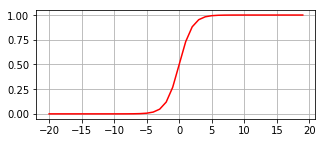

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def vizualize_sigmoid_function(xmin=-20, xmax=20, figsize=(5, 2)):
    nums = np.arange(xmin, xmax)
    plt.figure(figsize=figsize)
    plt.plot(nums, sigmoid(nums), 'r')
    plt.grid()
    plt.show()
    plt.close()

vizualize_sigmoid_function()

#### Binary vs Multinomial classification

There are two basic forms of LR [\[1\]](https://cntk.ai/pythondocs/CNTK_103B_MNIST_LogisticRegression.html): 
* binary LR: with a single output that can predict two classes
* multinomial LR: with multiple outputs, each of which is used to predict a single class.

<p style="text-align: center;">
<img src="http://www.cntk.ai/jup/cntk103b_TwoFormsOfLR-v3.png" alt="binary vs multiclass" style="height: 250px;"/>
(image from [source](https://cntk.ai/pythondocs/CNTK_103B_MNIST_LogisticRegression.html))
</p>

In **binary LR** the input features are each scaled by an associated weight and summed together.  
The sum is passed through the *sigmoid function* (the "squashing" or "activation" function) and generates an output in the $[0, 1]$ range.  
This output value can be interpreted as the class probability or the likelihood that the input features should be classified 'positively'.  
Comparing this output with a threshold (such as 0.5) will produce a binary label (0 or 1).  
This technique supports only classification problems with two output classes, hence the name binary LR.  

In **multinomial LR**, 2 or more output nodes are used, one for each output class to be predicted.  
Each summation node uses its own set of weights to scale the input features and sum them together.  
Instead of passing the summed output of the weighted input features through a sigmoid squashing function, the output is often passed through a softmax function (which in addition to squashing, like the sigmoid, the softmax normalizes each nodes' output value using the sum of all unnormalized nodes).





### Training a Logistic Regression classifier

Same as for the linear regression models, the coefficients for the logistic regression model can be found using the gradient descent technique.

The only changes will be made to the definitions of the cost function and the gradient function for the weight update:
* the **cost function**:  
$C = \frac{1}{n} \sum_{i=1}^{n}{(-y^{(i)} * log(\hat{y}^{(i)}) - (1 - y^{(i)}) * log(1-\hat{y}^{(i)}))}$ 
* the magnitude and direction of the **weight update** are computed by taking a step in the opposite direction of the cost gradient:  
$\Delta w_j = -\eta \frac{\partial C}{\partial w_j} = \eta \frac{1}{n} \sum_i^{n}{(\hat{y}^{(i)} - y^{(i)})} x_j^{(i)}$  
where $\eta$ is the learning rate - a constant limiting the correction amount of each coefficient at each update
* the weights are then updated after each epoch via the **update rule**: $w = w - \Delta w$

Functions for training a binary LR model with $m$ input features  
* $z = b + w_1 * x_1 + w_2 * x_2 + ... + w_m * x_m$  
* $a = \sigma(z) = \frac{1}{1+\mathrm{e}^{-z}}$

where $b$, $w1,...,w_m$ are the coefficients we must estimate from the training data.

In [2]:
def compute_cost(x, y, w, b):
    z = np.dot(x, w) + b
    a = sigmoid(z)
    j = np.inner(-y, np.log(a)) - np.inner((1 - y), np.log(1 - a))
    return j / len(x)

def gradient_descent(x, y, learning_rate, epochs):
    n = len(x)
    m = x.shape[-1]
    w = np.zeros(m)
    b = 0
    
    costs = []
    for epoch in range(epochs):
        z = np.dot(x, w) + b
        a = sigmoid(z)
        dz = a - y
        dw = 1./n * np.dot(x.T, dz) 
        db = 1./n * np.sum(dz)
        w -= learning_rate * dw
        b -= learning_rate * db
        costs.append(compute_cost(x, y, w, b))
        
    return (w, b), costs    

def stochastic_gradient_descent(x, y, learning_rate, epochs):
    n = len(x)
    m = x.shape[-1]
    w = np.zeros(m)
    b = 0
    
    costs = []
    for epoch in range(epochs):
        for observation, response in zip(x, y):
            z = np.dot(observation, w) + b
            a = sigmoid(z)
            dz = a - response
            dw = observation * dz
            db = dz
            w -= learning_rate * dw
            b -= learning_rate * db
        costs.append(compute_cost(x, y, w, b))
        
    return (w, b), costs

def prediction_accuracy(x, y, w, b):
    predictions = sigmoid(np.dot(x, w) + b)
    correct = [1 if ((a >= 0.5 and b == 1) or (a < 0.5 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
    accuracy = sum(correct) / len(correct)
    return accuracy

### Evaluating the performance of a Logistic Regression classifier

The classifier's performance is evaluated on a test corpus, containing previously unseen observations.  
The test corpus is represented by a data set $D = \{x^{<i>}, y^{<i>}\}$ with:
* $m$ test samples,
* each test sample $x^{<i>}$ is described by the same numerical features as the training samples
* the response $y^{<i>}$ represents the sample's category.

To evaluate the classifier's performance you must evaluate the amount of correct predictions it makes on the test set.  
In order to do this you will need to compare two labels:
* the *real* label: the $y^{<i>}$ response associated with the $i$'th sample in the test set
* the *hypothesis* label: the $\hat{y}^{<i>}$ label generated by the classifier (its prediction) for the $i$'th sample in the test set.

A prediction is correct only if the two labels match.  
In case of a binary classification, the quality of a prediction can have one of four types:
- *True Positive* (TP): both real and hypothesis labels are "1"
- *True Negative* (TN): both real and hypothesis labels are "0"
- *False Positive* (FP): the real label is "0", but the classifier predicted label "1"
- *False Negative* (FN): the real label is "1", but the classifier predicted label "0"

These 4 outcomes can be formulated in a 2x2 table called the **confusion-matrix**:

<table>
    <tr>
        <td colspan="4"> *Hypothesis label* </td>
    </tr>
    <tr>
        <td> </td>
        <td> </td>
        <td> **Positive** </td>
        <td> **Negative** </td>
    </tr>
    <tr> 
        <td rowspan="2"> *Real label* </td>
        <td> **Positive** </td>
        <td> TP </td>
        <td> FN </td>
    </tr>
    <tr> 
        <td> **Negative** </td>
        <td> FP </td>
        <td> TN </td>
    </tr>
</table>

The statistics computed on the set of classification predictions are [**precision** and **recall**](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html).  

The precision is the fraction of relevant instances among the retrieved instances.  
It's computed as $precision = \frac{TP}{TP + FP}$ (*TP + FP* is the sum of the 1st column in the confusion matrix).

The recall is the fraction of relevant instances that have been retrieved over the total amount of relevant instances.  
It's computed as $recall = \frac{TP}{TP + FN}$ (*TP + FN* is the sum of the 1st row in the confusion matrix).

The **[ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)**, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination *threshold* is varied.  
To draw a ROC curve, only the true positive rate (TPR) and false positive rate (FPR) are needed.  
The *TPR* defines how many correct positive results occur among all positive samples available during the test.  
The *FPR* defines how many incorrect positive results occur among all negative samples available during the test.


<p style="text-align: center;">
<img src="https://docs.eyesopen.com/toolkits/cookbook/python/_images/roc-theory-small.png" alt="ROC curve" style="height: 250px;"/>
(image from [source](https://docs.eyesopen.com/toolkits/cookbook/python/plotting/roc.html))
</p>

The ROC space depicts the relative trade-offs between true positive (benefits) and false positive (costs).   
The best prediction method would yield a point in the upper left corner or coordinate (0, 1) of the ROC space.  
The (0,1) point is also called a *perfect classification*.  
A random guess would give a point along a diagonal line from the left bottom to the top right corners.  
The diagonal divides the ROC space: 
* points above the diagonal represent good classification results (better than random)
* points below the line represent poor results (worse than random). 
        

### ML techniques

In this notebook we will discuss about many machine learning techniques related to data processing, model training and testing. 

#### [Feature engineering](https://en.wikipedia.org/wiki/Feature_engineering)

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.  
The [features](https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/) will directly influence the results of the predictive model.

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering."  
(Andrew Ng)

#### [Hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization)

Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm.  
The same kind of machine learning model can require different constraints, weights or learning rates to generalize different data patterns.  
These measures are called hyperparameters, and have to be tuned so that the model can optimally solve the machine learning problem. 

Hyperparameter optimization finds a tuple of hyperparameters that yields an optimal model which minimizes a predefined loss function on given independent data.

#### [Cross validation](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f)

After fitting  a machine-learning model, the next step is to assess the accuracy of that model.  
Before putting a model to use, you need to know how well it's expected to predict on new data.  
If the predictive performance seems to be quite good, the model can be deployed in production to analyze new data.  
Otherwise, the data and model need to be revizited in order to improve and optimize its accuracy.

As a reminder, in previous notebooks we simply split the data 90% for training and 10% for testing.  
Here we will learn about a better evaluation technique called *cross validation*.

Cross validation is a model validation technique for assessing how the results of a statistical analysis will generalize to an independent data set.  
It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

In K-fold cross validation, the data is divided into $k$ subsets and the holdout method is repeated $k$ times
* each time, one of the $k$ subsets is used as the test set/ validation set 
* the other $k - 1$ subsets are put together to form a training set.  

The error estimation is averaged over all $k$ trials to get total effectiveness of our model.  
Every data point gets to be in a validation set exactly once, and gets to be in a training set $k-1$ times.  
This significantly *reduces bias* as most of the data is used for fitting, and also significantly *reduces variance* as most of the data is also used for validation.  
Interchanging the training and test sets also adds to the effectiveness of this method.  
As a general rule and empirical evidence, $k=5$ or $k=10$ is generally preferred, but nothing's fixed and it can take any value.

### Application

Test the logistic regression model on a binary classification task: predict survival on the [Titanic](https://www.kaggle.com/c/titanic).  
This data set provides information on the fate of passengers on the fatal maiden voyage of the ocean liner "Titanic", summarized according to:
* PassengerId: the passenger's id (numerical feature)
* Ticket: ticket number (string feature)
* Fare: the price paid for the ticket (numerical feature)
* Name: the passenger's name (string feature) 
* Sex: the passenger's sex (string feature; 2 unique values male/female)
* Age: the passenger's age (numerical feature) 
* Pclass: economic status (numerical feature)
* SibSp: number of siblings / spouses aboard (numerical feature)
* Parch: number of parents / children aboard (numerical feature)
* Cabin: the cabin id and number (string feature)
* Embarked: the port of embarkation (string feature; 3 unque values C/S/Q)
* Survived: passenger survival indicator (binary feature; 0/1)

In [3]:
import pandas as pd

In [4]:
def load_data(fn='/src/data/03_lr_titanic-survival_train.csv'):
    return pd.read_csv(fn, header = 0)

data = load_data()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# check value counts on features
import json

def display_info(data, feature, fill_with=None):
    if fill_with:
        print("{:>10} values: {} ({} missing values)".format(
            feature,
            data[feature].fillna(fill_with).apply(lambda x:x[0]).value_counts().to_json(),
            data[feature].isnull().sum()))
    else:
        print("{:>10} values: {} ({} missing values)".format(
            feature,
            data[feature].value_counts().to_json(),
            data[feature].isnull().sum()))

display_info(data, 'Age')
display_info(data, 'Pclass')
display_info(data, 'Sex')
display_info(data, 'SibSp')
display_info(data, 'Parch')
display_info(data, 'Cabin', fill_with='X')
display_info(data, 'Embarked')

       Age values: {"24.0":30,"22.0":27,"18.0":26,"19.0":25,"30.0":25,"28.0":25,"21.0":24,"25.0":23,"36.0":22,"29.0":20,"32.0":18,"27.0":18,"35.0":18,"26.0":18,"16.0":17,"31.0":17,"20.0":15,"33.0":15,"23.0":15,"34.0":15,"39.0":14,"17.0":13,"42.0":13,"40.0":13,"45.0":12,"38.0":11,"50.0":10,"2.0":10,"4.0":10,"47.0":9,"44.0":9,"48.0":9,"54.0":8,"9.0":8,"1.0":7,"51.0":7,"52.0":6,"14.0":6,"3.0":6,"49.0":6,"41.0":6,"37.0":6,"15.0":5,"43.0":5,"58.0":5,"11.0":4,"62.0":4,"60.0":4,"8.0":4,"56.0":4,"5.0":4,"46.0":3,"65.0":3,"7.0":3,"6.0":3,"61.0":3,"55.0":2,"28.5":2,"71.0":2,"59.0":2,"63.0":2,"0.83":2,"30.5":2,"70.0":2,"57.0":2,"0.75":2,"13.0":2,"10.0":2,"64.0":2,"40.5":2,"32.5":2,"45.5":2,"20.5":1,"24.5":1,"0.67":1,"14.5":1,"0.92":1,"74.0":1,"34.5":1,"80.0":1,"12.0":1,"36.5":1,"53.0":1,"55.5":1,"70.5":1,"66.0":1,"23.5":1,"0.42":1} (177 missing values)
    Pclass values: {"3":491,"1":216,"2":184} (0 missing values)
       Sex values: {"male":577,"female":314} (0 missing values)
     SibSp values:

#### Feature engineering
* remove irrelevant features for classification (e.g. the 'PassengerId', 'Name' and 'Ticket' features)
* impute missing values: delete entries with missing values or fill the missing values with a possible valid replacement
* transform the **categorical features** into **numerical features**, which is the prefered format for most machine learning algorithms 
    * replace the string-based 'Sex' column into 2 new binary columns: SexMale, SexFemale
    * replace the string-based 'Cabin' column into 9 new binary columns: CabinA, CabinB, ..., CabinG, CabinT, CabinX
    * replace the string-based 'Embarked' column into 3 new binary columns: EmbarkedC, EmbarkedQ, EmbarkedS
* keep the features 'Pclass', 'SibSp', 'Parch' intact: they are valid **numerical features**; even if they can be placed into buckets, the order of their values is important 
* normalize the 'Fare' feature: the distributions of fare paid are highly skewed (many small values and a few large outliers), to have 

These preprocessings are chosen for the *preprocess_1* method described below.  
Two other preprocessing choices ([preprocess_2](https://www.manning.com/books/real-world-machine-learning), [preprocess_3](https://www.kaggle.com/manojsakhala/titanic-dataset-solution)) are considered in comparison. 

In [7]:
import math
from sklearn import preprocessing

def dummy_variables(data, field):
    values = sorted(list(data[field].value_counts().index))
    for value in values:
        value = str(value)
        data[field+value.capitalize()]= (data[field] == value).astype(int)
    data.drop(field, 1, inplace=True)
    
def preprocess_1(data):
    cdata = data.copy()
    
    # remove irrelevant features
    cdata.drop('PassengerId', 1, inplace=True)
    cdata.drop('Name', 1, inplace=True)
    cdata.drop('Ticket', 1, inplace=True)
    
    # drop the 2 rows with missing Embarked data
    cdata.dropna(subset=['Embarked'], inplace=True)
    
    # remove the 'Age' feature (too many missing values)
    cdata.drop('Age', 1, inplace=True)

    # create "dummy" variables
    dummy_variables(cdata, 'Sex')
    dummy_variables(cdata, 'Embarked')
   
    # assume missing 'cabin' information for lower class passengers: fill them with 'X'
    cdata.Cabin.fillna('X', inplace=True)
    cdata.Cabin = cdata.Cabin.apply(lambda x:x[0])
    dummy_variables(cdata, 'Cabin')
    
    # normalize the sparse 'fare' information
    cdata.Fare = cdata.Fare.apply(math.sqrt)
    
    return cdata

def preprocess_2(data):
    cdata = data.copy()
    
    # remove irrelevant features
    cdata.drop('PassengerId', 1, inplace=True)
    cdata.drop('Name', 1, inplace=True)
    cdata.drop('Ticket', 1, inplace=True)
    cdata.drop('Cabin', 1, inplace=True)
        
    # drop the 177 rows with missing age data
    cdata.dropna(subset=['Age'], inplace=True)
    cdata.Age = cdata.Age.astype(int)
    
    # drop the 2 rows with missing Embarked data
    cdata.dropna(subset=['Embarked'], inplace=True)
    
    # create "dummy" variables
    dummy_variables(cdata, 'Sex')
    dummy_variables(cdata, 'Embarked')

    # normalize the sparse 'fare' information
    cdata.Fare = cdata.Fare.apply(math.sqrt)
    
    return cdata

def preprocess_3(data):
    cdata = data.copy()
    
    # remove irrelevant features
    cdata.drop('PassengerId', 1, inplace=True)
    cdata.drop('Ticket', 1, inplace=True)
    cdata.drop('Cabin', 1, inplace=True)
    
    # make a binary "Sex" feature
    cdata['Sex'] = cdata['Sex'].map({"male" : 0, "female" : 1})
    
    # make a numerical "Embarked" feature
    # fill missing data with most common Embarked value: 'S'
    cdata['Embarked'].fillna('S', inplace=True)
    cdata['Embarked'] = cdata['Embarked'].map({"S" : 0, "C" : 1, "Q" : 2})

    # extract titles from names and remove the name feature 
    cdata['Title'] = cdata["Name"].map(lambda name : name.split(".")[0].split(" ")[-1])
    cdata['Title'].fillna("Others", inplace=True)
    cdata['Title'] = cdata['Title'].map({
        "Mr" : 0, "Sir": 1,
        "Mrs" : 1, "Mme": 1, "Ms": 1, "Countess": 1,
        "Miss" : 2, "Mlle": 2, "Lady": 2, 
        "Master" : 3, 
        "Others" : 4, "Dr": 4, "Rev": 4, "Major": 4, "Col": 4, "Don": 4, "Jonkheer": 4, "Capt": 4})
    cdata.drop('Name', 1, inplace=True)
    
    # set age feature
    cdata['AgeCategory'] = "Adult"
    cdata.loc[cdata["Age"] < 18, 'AgeCategory'] = "Child"
    cdata.loc[cdata["Age"] > 50, 'AgeCategory'] = "Old"
    cdata.loc[cdata["Age"].isnull(), 'AgeCategory'] = "MissingData"
    cdata["AgeCategory"] = cdata["AgeCategory"].map({"Child" : 0, "Adult" : 1, "Old" : 2, "MissingData" : 3})
    cdata.drop('Age', 1, inplace=True)
    
    # set 'family' feature from SibSp and Parch, we can add whether a person has a family or not
    # set 'family size' feature: number of family members onboard
    
    cdata['Family'] = cdata['SibSp'] + cdata['Parch'] + 1
    cdata['FamilySize'] = cdata['SibSp'] + cdata['Parch'] + 1
    
    cdata.loc[cdata['Family'] == 1, 'FamilySize'] = "Small"
    cdata.loc[cdata['Family'] > 1, 'FamilySize'] = "Medium"
    cdata.loc[cdata['Family'] > 5, 'FamilySize'] = "Large"
    cdata['FamilySize'] = cdata['FamilySize'].map({"Small" : 0, "Medium" : 1, "Large" : 2})
    
    cdata.loc[cdata['Family'] > 1, 'Family'] = 'withFamily'
    cdata.loc[cdata['Family'] == 1, 'Family'] = 'Alone'
    cdata['Family'] = cdata['Family'].map({"Alone" : 0, "withFamily" : 1})
    
    
    # drop the 'SibSp' and 'Parch' features
    cdata.drop('SibSp', 1, inplace=True)
    cdata.drop('Parch', 1, inplace=True)
    
    # normalize fare feature
    scale = preprocessing.MinMaxScaler()
    values = scale.fit_transform(cdata['Fare'].values.reshape(-1,1))
    cdata['normalizedFare'] = values
    cdata.drop('Fare', 1, inplace=True)
    
    return cdata

In [8]:
data = load_data()
data = preprocess_1(data)
data.head()

,Survived,Pclass,SibSp,Parch,Fare,SexFemale,SexMale,EmbarkedC,EmbarkedQ,EmbarkedS,CabinA,CabinB,CabinC,CabinD,CabinE,CabinF,CabinG,CabinT,CabinX
0,0,3,1,0,2.692582,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,1,1,1,0,8.442944,1,0,1,0,0,0,0,1,0,0,0,0,0,0
2,1,3,0,0,2.815138,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,1,1,0,7.286975,1,0,0,0,1,0,0,1,0,0,0,0,0,0
4,0,3,0,0,2.837252,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [9]:
def data_plot(data, field1, field2):
    positive = data[data.Survived == 1]
    negative = data[data.Survived == 0]
    plt.figure(figsize=(10, 4))
    plt.scatter(positive[field1], positive[field2], label='Survived', color='g', marker='o')
    plt.scatter(negative[field1], negative[field2], label='Did not survive', color='r', marker='x', alpha=0.5)
    plt.xlabel(field1)
    plt.ylabel(field2)
    plt.legend()
    plt.title('Feature importance to survival')
    plt.show()
    plt.close()

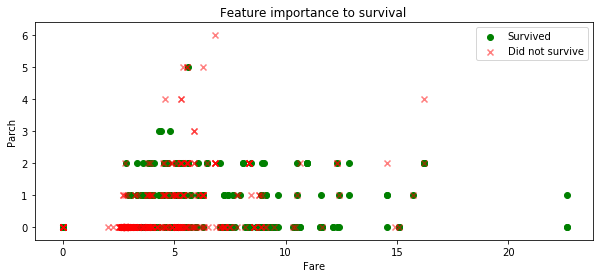

In [10]:
data_plot(data, 'Fare', 'Parch')

Prepare data for classification

In [11]:
x = data.iloc[:, data.columns != 'Survived'].values
y = data.Survived.values
print("Features shape: {}".format(x.shape))
print("Output shape: {}".format(y.shape))

Features shape: (889, 18)
Output shape: (889,)


Draw the costs evolution

In [12]:
def draw_costs(costs, epochs):
    plt.plot(np.arange(epochs), costs, 'r')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Error vs. Training Epoch')
    plt.show()
    plt.close()

### Gradient descent evaluation

In [13]:
# set up the learning rate and the number of epochs
eta = 0.05
epochs = 1000

(w, b), costs = gradient_descent(x, y, eta, epochs)
print("w={}".format(w))
print("b={}".format(b))

w=[-0.33785337 -0.30737156 -0.13301158  0.16082508  1.35053914 -1.19288913
  0.20487583  0.0726672  -0.11989303  0.0156538   0.04886844 -0.17165038
  0.17631644  0.28164711  0.15463929 -0.01736832 -0.02205855 -0.30839784]
b=0.15765000558452816


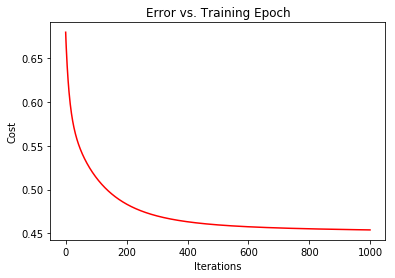

In [14]:
draw_costs(costs, epochs)

In [15]:
acc = prediction_accuracy(x, y, w, b)
print("Accuracy={:.2%}".format(acc))

Accuracy=79.42%


### Stochastic gradient descent evaluation

In [16]:
# set up the learning rate and the number of epochs
eta = 0.0001
epochs = 1000

(w, b), costs = stochastic_gradient_descent(x, y, eta, epochs)
print("w={}".format(w))
print("b={}".format(b))

w=[-0.37819731 -0.30292328 -0.15006107  0.14581912  1.47321287 -1.18254077
  0.28253936  0.08209559 -0.07396284  0.03259149  0.05183266 -0.26314977
  0.25245997  0.42523639  0.25675353 -0.04529375 -0.03802814 -0.38173028]
b=0.29067210391087334


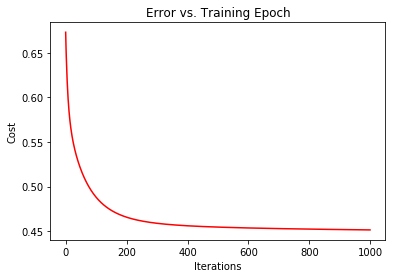

In [17]:
draw_costs(costs, epochs)

In [18]:
acc = prediction_accuracy(x, y, w, b)
print("Accuracy={:.2%}".format(acc))

Accuracy=79.42%


### Solve the problem using sklearn's LinearRegression model

In [19]:
from sklearn.linear_model import LogisticRegression

x = data.drop('Survived', axis=1).values
y = data.Survived.values

model = LogisticRegression()
model.fit(x, y)

weights = model.coef_
b = model.intercept_
print("Model's coefficients:\nb={}\nw={}".format(b.round(3), [w.round(3) for w in weights]))

Model's coefficients:
b=[0.578]
w=[array([-0.522, -0.269, -0.119,  0.101,  1.623, -1.045,  0.41 ,  0.194,
       -0.027, -0.007,  0.009, -0.418,  0.412,  0.765,  0.86 , -0.347,
       -0.322, -0.375])]


**Performance evaluation**
* accuracy
* confusion matrix
* precision & recall
* ROC curve

Accuracy:
79.53%

ConfusionMatrix:
[[465  84]
 [ 98 242]]

Report:
             precision    recall  f1-score   support

          0       0.83      0.85      0.84       549
          1       0.74      0.71      0.73       340

avg / total       0.79      0.80      0.79       889



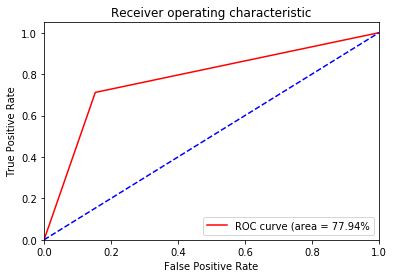

In [20]:
from sklearn import metrics

predicted = model.predict(x)
print("Accuracy:\n{:.2%}".format(metrics.accuracy_score(y, predicted)))
print("\nConfusionMatrix:\n{}".format(metrics.confusion_matrix(y, predicted)))
print("\nReport:\n{}".format(metrics.classification_report(y, predicted)))

def plot_roc(fpr, tpr, roc_auc):
    plt.plot(
        fpr, 
        tpr,
        color='red',
        label="ROC curve (area = {:.2%}".format(roc_auc))
    plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

fpr, tpr, thresholds = metrics.roc_curve(y, predicted)
auc = metrics.roc_auc_score(y, predicted)
plot_roc(fpr, tpr, auc)

Train model with **10-fold cross-validation**

In [21]:
from sklearn.model_selection import cross_val_score

x = data.drop('Survived', axis=1).values
y = data.Survived.values

model = LogisticRegression()
scores = cross_val_score(model, x, y, cv=10)
accuracy = scores.mean()
print("Accuracy:\nmean={:.2%}\nall={}".format(accuracy, scores))

Accuracy:
mean=78.97%
all=[0.76404494 0.75280899 0.7752809  0.83146067 0.79775281 0.7752809
 0.7752809  0.78651685 0.84269663 0.79545455]


**Tuning hyperparameters**

In [22]:
import json
from sklearn.model_selection import GridSearchCV

params = [
    {
        'C': [10**x for x in range(-10, 10)],
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
    },
    {
        'C': [10**x for x in range(-10, 10)],
        'solver': ['lbfgs', 'newton-cg'],
        'penalty': ['l2'],
        'tol': [0.005],
    }
]

print("GridSearch on params:\n{}".format(json.dumps(params, indent=4)))

for i in range(1, 4):
    preprocessing_method = locals()["preprocess_{}".format(i)]
    
    data = load_data()
    data = preprocessing_method(data)
    
    print("\nCurrently trying the features from the {} preprocessing method".format(
        preprocessing_method.__name__))
    
    x = data.drop('Survived', axis=1).values
    y = data.Survived.values

    lr = LogisticRegression()
    clf = GridSearchCV(lr, params, error_score=-1)
    clf.fit(x, y)

    print("Best score {:.2%} obtained with the parameters {}".format(
        clf.best_score_, clf.best_params_))

GridSearch on params:
[
    {
        "C": [
            1e-10,
            1e-09,
            1e-08,
            1e-07,
            1e-06,
            1e-05,
            0.0001,
            0.001,
            0.01,
            0.1,
            1,
            10,
            100,
            1000,
            10000,
            100000,
            1000000,
            10000000,
            100000000,
            1000000000
        ],
        "penalty": [
            "l1",
            "l2"
        ],
        "solver": [
            "liblinear"
        ]
    },
    {
        "C": [
            1e-10,
            1e-09,
            1e-08,
            1e-07,
            1e-06,
            1e-05,
            0.0001,
            0.001,
            0.01,
            0.1,
            1,
            10,
            100,
            1000,
            10000,
            100000,
            1000000,
            10000000,
            100000000,
            1000000000
        ],
        "penalty": [